# HSE 2024: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [51]:

def find_product(a, r, N):
    arr_product = a * np.power(r, np.arange(N))
    return arr_product

a = 2
r = 3
N = 3
print(find_product(a, r, N))


[ 2  6 18]


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back.

In [40]:
def check_palindrome(N):
    str_N = str(N)
    is_palindrome = str_N == str_N[::-1]
    return is_palindrome

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))


3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [41]:
def check_palindrome(N):
    str_N = str(N)
    return str_N == str_N[::-1]

def find_palindromes(N):
    palindromes = []
    num = 1000
    while len(palindromes) < N:
        if check_palindrome(num):
            palindromes.append(num)
        num += 1
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))


[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [49]:
from random import randint

def find_min(a, b, c):
    if a < b:
        min_ = a
    else:
        min_ = b

    if c < min_:
        min_ = c

    return min_

for i in range(10):
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMinimum:', find_min(a, b, c))


31 -44 -31 	Minimum: -44
-5 -95 -5 	Minimum: -95
-79 -5 96 	Minimum: -79
-90 1 -79 	Minimum: -90
92 -71 -81 	Minimum: -81
-90 -17 -45 	Minimum: -90
38 -59 -61 	Minimum: -61
28 -55 76 	Minimum: -55
95 90 -98 	Minimum: -98
61 -83 70 	Minimum: -83


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [43]:

random_array = np.random.rand(17)

my_array = random_array * (6 / np.sum(random_array))

print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')


Length: 17
Sum of elements: 6.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [44]:


a = np.random.rand(10)
b = np.random.rand(10)

def calculate_manhattan(a, b):

    distance = np.sum(np.abs(a - b))
    return distance

def calculate_euclidean(a, b):

    distance = np.sqrt(np.sum((a - b) ** 2))
    return distance

def calculate_chebyshev(a, b):

    distance = np.max(np.abs(a - b))
    return distance

def calculate_cosine(a, b):

    dot_product = np.sum(a * b)
    norm_a = np.sqrt(np.sum(a ** 2))
    norm_b = np.sqrt(np.sum(b ** 2))
    distance = 1 - (dot_product / (norm_a * norm_b))
    return distance


print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')


Manhattan distance: 3.727704631745428
Euclidean distance: 1.3097166485919998
Chebyshev distance: 0.6159489515257763
Cosine distance: 0.20972625984927828


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [45]:

def transform(array):

    max_val = np.max(array)
    min_val = np.min(array)


    transformed_array = np.copy(array)


    transformed_array[transformed_array == max_val] = -1


    transformed_array[transformed_array == min_val] = -4
    mask = (array != max_val) & (array != min_val)
    transformed_array[mask] = -4 + 3 * (array[mask] - min_val) / (max_val - min_val)

    return transformed_array


my_array = np.random.randint(0, 100, size=76)


my_array = transform(my_array)


print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)


Min: -4
Max: -1
Array:
[-1 -3 -3 -1 -2 -1 -3 -2 -3 -4 -3 -1 -1 -3 -3 -3 -1 -2 -3 -1 -1 -2 -1 -1
 -3 -3 -2 -3 -2 -2 -2 -3 -1 -2 -1 -1 -3 -3 -1 -3 -3 -2 -1 -1 -1 -3 -1 -1
 -3 -2 -2 -3 -1 -3 -2 -1 -3 -1 -2 -1 -2 -3 -1 -2 -3 -3 -3 -3 -2 -1 -2 -2
 -2 -1 -3 -2]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [46]:

my_array = np.random.randint(-7, 44, size=(8, 5))


max_element_index = np.unravel_index(np.argmax(my_array, axis=None), my_array.shape)
selected_column = my_array[:, max_element_index[1]]


print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')


Shape:  (8, 5)
Array:
[[38 36  4 13 13]
 [ 7 -1 10 -2  3]
 [ 6 38 18 21  5]
 [12  2 40 15 11]
 [16  9  8 13 37]
 [18 -3 33 25 38]
 [-2 -1 37 35 29]
 [23 25 43 39 -1]]
Selected column: [ 4 10 18 40  8 33 37 43]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [52]:

arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

def replace_missing(arr):

    median_value = np.nanmedian(arr)


    arr[np.isnan(arr)] = median_value

    return arr

arr = replace_missing(arr)

print('Array with no missing values:')
print(arr)


Array:
[0.59482195        nan        nan 0.77948286 0.00161659        nan
 0.99890583        nan 0.21513481 0.76581957]
Array with no missing values:
[0.59482195 0.68032076 0.68032076 0.77948286 0.00161659 0.68032076
 0.99890583 0.68032076 0.21513481 0.76581957]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [53]:

def mean_channel(X):

    mean_vector = np.mean(X, axis=(0, 1))
    return mean_vector

n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))

mean_vector = mean_channel(X)
print(f'Vector of means: {mean_vector}')


Vector of means: [-1.85354691 -1.99084668 -2.07322654]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [54]:

def get_unique_columns(X):

    reshaped_X = X.reshape(X.shape[0], -1)

    _, unique_indices = np.unique(reshaped_X, axis=0, return_index=True)


    X_unique = X[sorted(unique_indices)]

    return X_unique

n = 3
X = np.array([[[1, 2, 3],
               [1, 2, 3],
               [1, 2, 3]],

              [[4, 5, 6],
               [4, 5, 7],
               [4, 5, 6]],

              [[7, 8, 9],
               [7, 8, 9],
               [7, 8, 9]]])

print('Matrix:')
print(X)
print('Unique rows:')
unique_rows = get_unique_columns(X)
print(unique_rows)


Matrix:
[[[1 2 3]
  [1 2 3]
  [1 2 3]]

 [[4 5 6]
  [4 5 7]
  [4 5 6]]

 [[7 8 9]
  [7 8 9]
  [7 8 9]]]
Unique rows:
[[[1 2 3]
  [1 2 3]
  [1 2 3]]

 [[4 5 6]
  [4 5 7]
  [4 5 6]]

 [[7 8 9]
  [7 8 9]
  [7 8 9]]]


# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [55]:

file_path = '/content/titanic.csv'
titanic_data = pd.read_csv(file_path)

titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

#### 1. Are there any missing values? In what columns?
**Answer:**
Yes, there are missing values in the columns:
- **Age**: 177 missing values
- **Cabin**: 687 missing values
- **Embarked**: 2 missing values

In [56]:
missing_values = titanic_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

,0
Age,177
Cabin,687
Embarked,2


#### 2. What is the percentage of survived passengers? Are the classes balanced?
**Answer:**
- The percentage of passengers who survived is **38.38%**.
- The classes are **not balanced**. A larger proportion of passengers did not survive (61.62%) compared to those who did (38.38%). (So sad)

In [ ]:
survived_percentage = (titanic_data['Survived'].mean()) * 100
class_counts = titanic_data['Survived'].value_counts(normalize=True) * 100
survived_percentage, class_counts

(38.38383838383838,
 Survived
 0    61.616162
 1    38.383838
 Name: proportion, dtype: float64)

#### 3. Were there more males or females?
**Answer:**
There were **more males** than females on the Titanic:
- **Males**: 577
- **Females**: 314

In [ ]:
gender_counts = titanic_data['Sex'].value_counts()
gender_counts

,count
Sex,
male,577
female,314


#### 4. What was the least popular port of embarkation?
**Answer:**
The least popular port of embarkation was **Queenstown (Q)**.

In [ ]:
embarkation_counts = titanic_data['Embarked'].value_counts()
least_popular_port = embarkation_counts.idxmin()
print(f"Least Popular Port of Embarkation: {least_popular_port}")

Least Popular Port of Embarkation: Q


#### 5. How many classes (pclass) were there on Titanic?
**Answer:**
There were **3** passenger classes on the Titanic.

In [57]:
num_classes = titanic_data['Pclass'].nunique()
num_classes

3

#### 6. What is the overall average ticket fare? And for every class?
**Answer:**
- **Overall Average Ticket Fare**: 32.20
- **Average Ticket Fare by Class**:
  - 1st Class: 84.15
  - 2nd Class: 20.66
  - 3rd Class: 13.68

In [58]:

overall_avg_fare = titanic_data['Fare'].mean()


class_avg_fare = titanic_data.groupby('Pclass')['Fare'].mean()

print(f"Overall Average Ticket Fare: {overall_avg_fare:.2f}")
print(f"Average Ticket Fare by Class:\n{class_avg_fare}")


Overall Average Ticket Fare: 32.20
Average Ticket Fare by Class:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

#### 1. What is the minimal and maximum ages of the passengers? Visualize it on the plot.
**Answer:**
- **Minimum Age**: 0.42 years old
- **Maximum Age**: 80.0 years old
-(Marked in the plot)

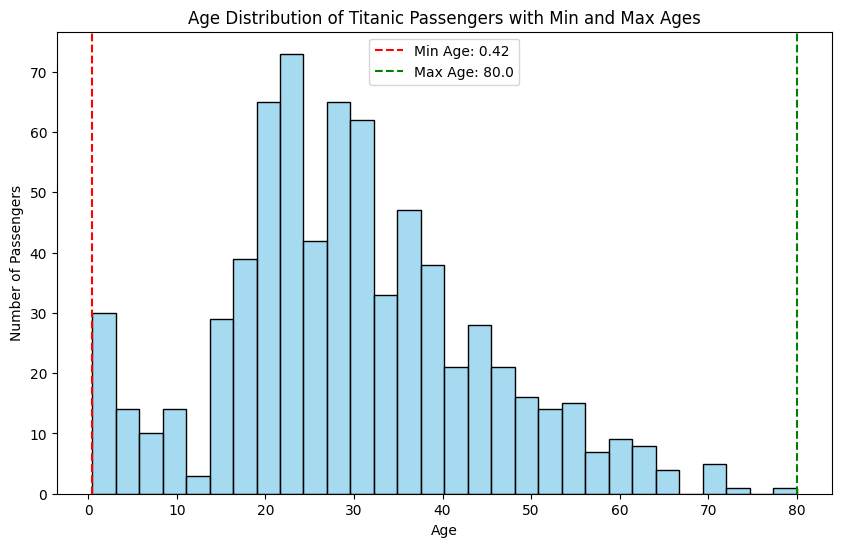

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

min_age = titanic_data['Age'].min()
max_age = titanic_data['Age'].max()

plt.figure(figsize=(10, 6))

sns.histplot(titanic_data['Age'].dropna(), kde=False, bins=30, color='skyblue')

plt.axvline(min_age, color='red', linestyle='--', label=f'Min Age: {min_age}')
plt.axvline(max_age, color='green', linestyle='--', label=f'Max Age: {max_age}')

plt.title('Age Distribution of Titanic Passengers with Min and Max Ages')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

plt.show()


#### 2. What is the mean age? And among males and females separately? Visualize it on the plot.
**Answer:**
- **Overall Mean Age**: 29.70 years
- **Mean Age for Males**: 30.73 years
- **Mean Age for Females**: 27.92 years

These mean ages are visualized on the third plot:
- Overall mean age is marked by a blue line.
- Mean age for males is marked by an orange line.
- Mean age for females is marked by a purple line.

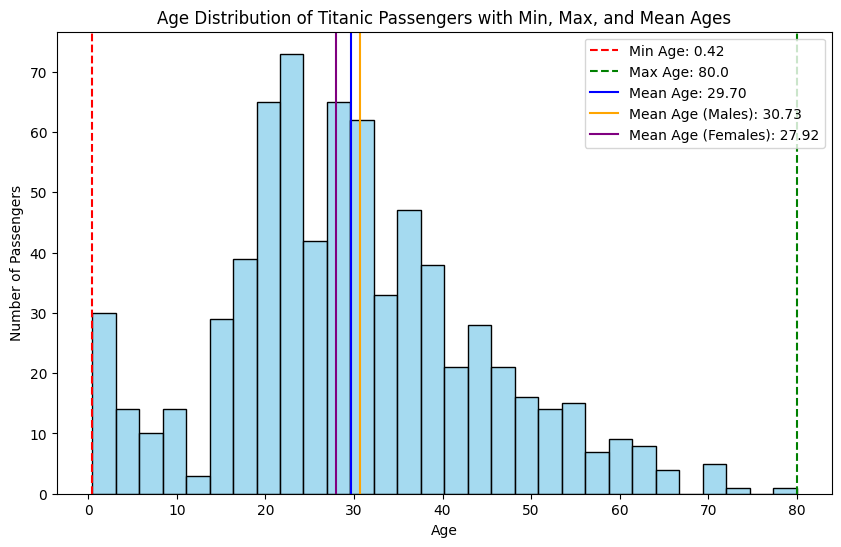

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

min_age = titanic_data['Age'].min()
max_age = titanic_data['Age'].max()
mean_age = titanic_data['Age'].mean()
mean_age_male = titanic_data[titanic_data['Sex'] == 'male']['Age'].mean()
mean_age_female = titanic_data[titanic_data['Sex'] == 'female']['Age'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'].dropna(), kde=False, bins=30, color='skyblue')

plt.axvline(min_age, color='red', linestyle='--', label=f'Min Age: {min_age}')
plt.axvline(max_age, color='green', linestyle='--', label=f'Max Age: {max_age}')


plt.axvline(mean_age, color='blue', linestyle='-', label=f'Mean Age: {mean_age:.2f}')
plt.axvline(mean_age_male, color='orange', linestyle='-', label=f'Mean Age (Males): {mean_age_male:.2f}')
plt.axvline(mean_age_female, color='purple', linestyle='-', label=f'Mean Age (Females): {mean_age_female:.2f}')

plt.title('Age Distribution of Titanic Passengers with Min, Max, and Mean Ages')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()

plt.show()


#### 3. Make conclusions about what you see on the plot.
- The age distribution is heavily skewed towards younger passengers, basically those in their 20s and 30s. The peak age group appears to be in the 20-30 range, showing that this was the most common age group aboard the Titanic.

- The minimum age of passengers is very low (0.42 years), which means that there were infants aboard the ship. The maximum age of 80 years shows that elderly passengers were also present, though they were far fewer in number.

- The mean age of all passengers is around 29.70 years, slightly higher for males (30.73 years) and slightly lower for females (27.92 years). This suggests that male passengers tended to be older on average compared to female passengers.

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

#### 1. How many unique titles are there?
**Answer:**
- There are **16 unique titles** in the dataset.

In [ ]:
titanic_data['Title'] = titanic_data['Name'].str.extract(r',\s*([^ ]*\.)')
titanic_data[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr.
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.
2,"Heikkinen, Miss. Laina",Miss.
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.
4,"Allen, Mr. William Henry",Mr.


In [ ]:
unique_titles_count = titanic_data['Title'].nunique()
unique_titles_count

16

#### 2. How many passengers are there with every title?
**Answer:**
The number of passengers with each title isbelow

In [ ]:
title_counts = titanic_data['Title'].value_counts()
title_counts

,count
Title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Major.,2
Mlle.,2
Col.,2


#### 3. What is the most popular man's title? And woman's title?
**Answer:**
- **Most Popular Man's Title**: **Mr.** (with 517 passengers)
- **Most Popular Woman's Title**: **Miss.** (with 182 passengers)

In [ ]:
titanic_data['Title'] = titanic_data['Name'].str.extract(r',\s*([^ ]*\.)')

title_gender = titanic_data.groupby('Title')['Sex'].agg(lambda x: x.mode()[0])

male_titles = title_gender[title_gender == 'male'].index.tolist()
female_titles = title_gender[title_gender == 'female'].index.tolist()

most_popular_male_title = titanic_data[titanic_data['Title'].isin(male_titles)]['Title'].mode()[0]
most_popular_female_title = titanic_data[titanic_data['Title'].isin(female_titles)]['Title'].mode()[0]

male_title_count = titanic_data[titanic_data['Title'] == most_popular_male_title].shape[0]
female_title_count = titanic_data[titanic_data['Title'] == most_popular_female_title].shape[0]

most_popular_male_title, male_title_count, most_popular_female_title, female_title_count


('Mr.', 517, 'Miss.', 182)

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



### **1. Is there a correlation between `pclass` and `ticket price`?**

**Answer:**
- **Correlation Coefficient:** The correlation between `Pclass` and `Fare` is **-0.5495**. This is a more strong negative correlation.
- **Interpretation:** This negative correlation points that as the `Pclass` increases (i.e., moving from 1st class to 3rd class), the ticket price tends to decrease. In easy meaning I am trying to say is that, 1st class passengers generally paid higher fares compared to those in 2nd and 3rd class.

In [ ]:

correlation_pclass_fare = titanic_data['Pclass'].corr(titanic_data['Fare'])

correlation_pclass_fare


-0.5494996199439074

### **2. Calculate the mean price for each port of embarkation.**

**Answer:**
- The mean fare for each port is:
  - **Cherbourg (C):** $59.95

  - **Queenstown (Q):** $13.28
  
  - **Southampton (S):** $27.08
- **Interpretation:** The mean fare is highest for passengers who embarked at Cherbourg (`C`), which suggests that more passengers from this port were traveling in higher classes (1st class), while passengers from Queenstown (`Q`) were maybe in 3rd class.

In [ ]:

mean_fare_by_port = titanic_data.groupby('Embarked')['Fare'].mean()

mean_fare_by_port


,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


**Violin Plot Analysis:**
- The violin plot shows the distribution of fares for each embarkation port (`S`, `C`, `Q`):
  - **Cherbourg (C):** The distribution is wide with a long tail, that shows  a large range of ticket prices, especially at the higher end. This reflects the presence of many 1st class passengers.
  - **Southampton (S):** The distribution is also wide but with a concentration around lower to middle fares, indicating a mix of passengers from different classes.
  - **Queenstown (Q):** The distribution is narrow and centered around low fares, whcih means that the most passengers who embarked here were in 3rd class.


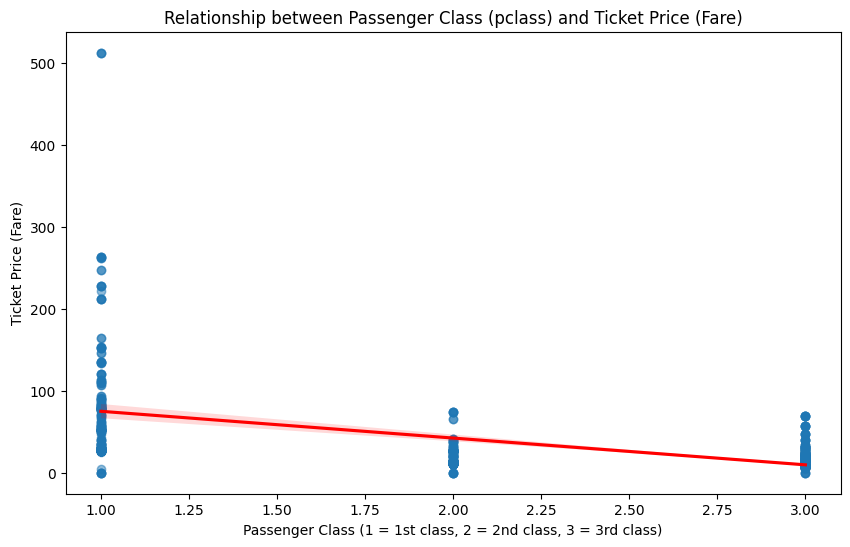

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='Pclass', y='Fare', data=titanic_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Relationship between Passenger Class (pclass) and Ticket Price (Fare)')
plt.xlabel('Passenger Class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)')
plt.ylabel('Ticket Price (Fare)')
plt.show()


**Scatter Plot with Regression Line:**
- The scatter plot with a regression line reaffirms the negative correlation between `Pclass` and `Fare`. Passengers in 1st class (pclass = 1) generally paid higher fares, while those in 3rd class (pclass = 3) paid significantly lower fares.

<ipython-input-31-dfa034e8c81a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Embarked', y='Fare', data=titanic_data, palette='Set3')


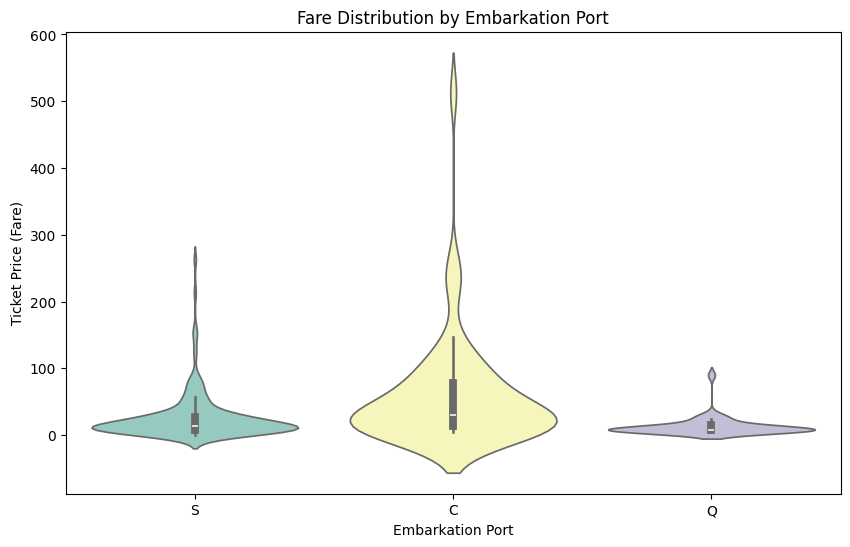

In [ ]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Embarked', y='Fare', data=titanic_data, palette='Set3')

plt.title('Fare Distribution by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Ticket Price (Fare)')
plt.show()


**Pair Plot Analysis:**
- The pair plot provides a view of the relationships between `pclass`, `fare`, and `age`, color-coded by embarkation port. It further supports the observations:
  - Higher ticket prices are associated with 1st class passengers, many of whom embarked from Cherbourg (`C`).
  - The distribution of `pclass` shows a clear distinction between the different ports, with Cherbourg (`C`) having a higher proportion of 1st class passengers.

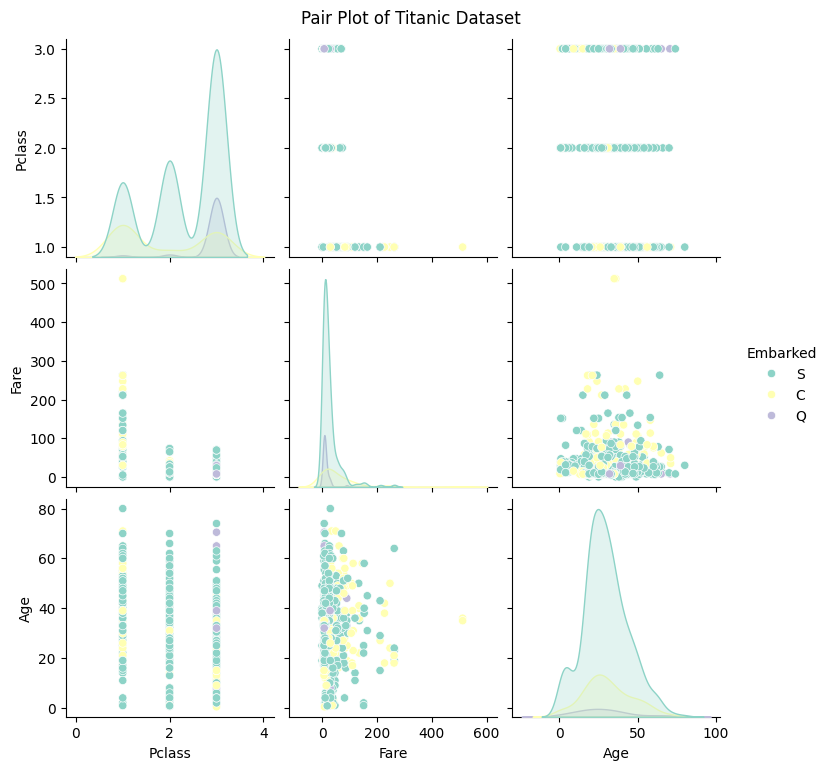

In [ ]:

sns.pairplot(titanic_data, vars=['Pclass', 'Fare', 'Age'], hue='Embarked', palette='Set3')
plt.suptitle('Pair Plot of Titanic Dataset', y=1.02)
plt.show()


### **So in the end we can say:**
- **Correlation:** This correlation between `pclass` and `fare`, indicates that higher class tickets were more expensive.
- **Port-wise Analysis:** Cherbourg (`C`) had the highest mean ticket price and the widest fare distribution, reflecting a higher number of 1st class passengers. Queenstown (`Q`) had the lowest mean fare, indicative of predominantly 3rd class passengers.


**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

<ipython-input-33-547b44c2b634>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Embarked', y='Fare', data=titanic_data, palette='Set3')


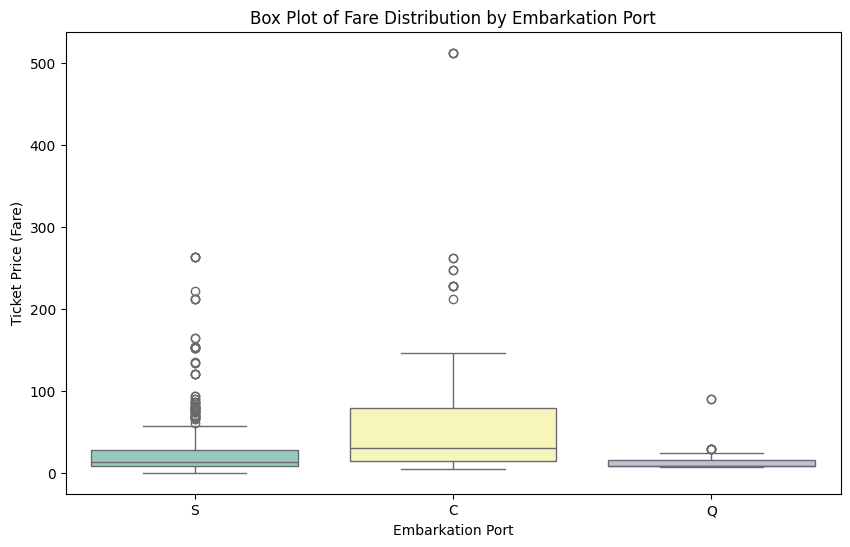

<ipython-input-33-547b44c2b634>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Embarked', y='Fare', data=titanic_data, palette='Set3')


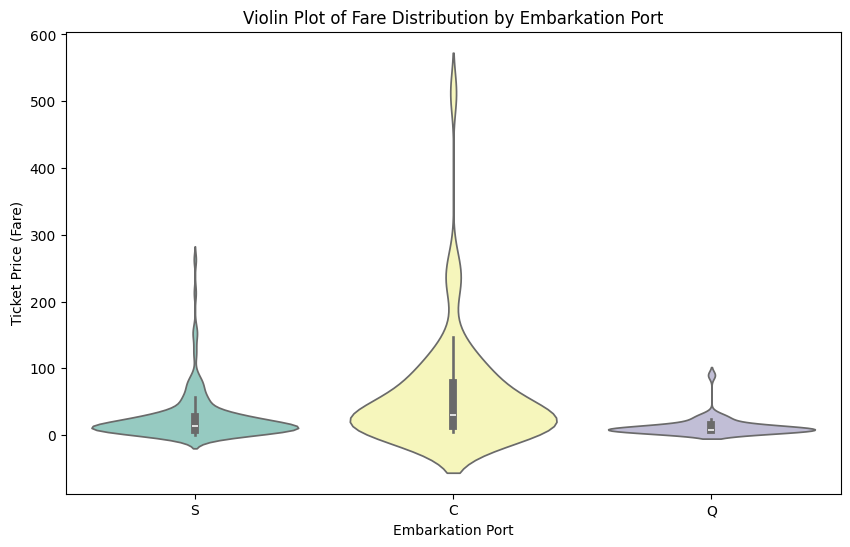

<ipython-input-33-547b44c2b634>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Embarked', y='Fare', data=titanic_data, jitter=True, palette='Set3')


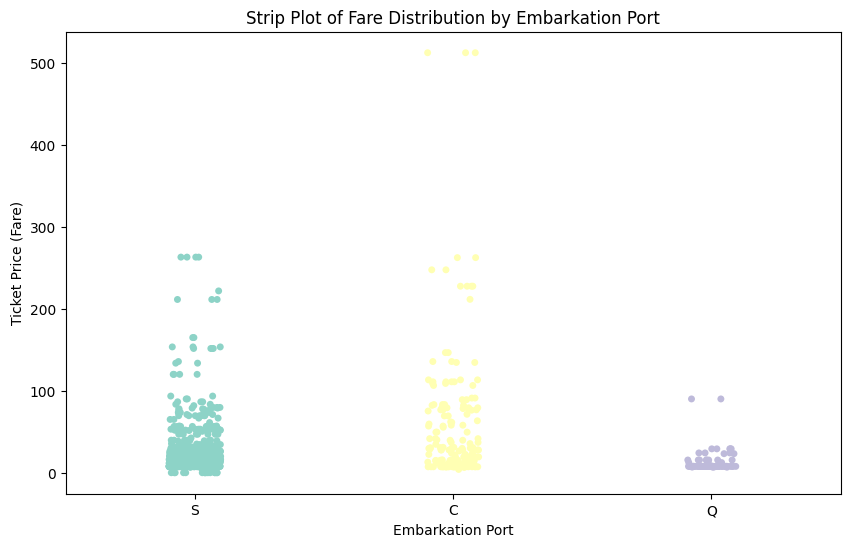

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Fare', data=titanic_data, palette='Set3')

plt.title('Box Plot of Fare Distribution by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Ticket Price (Fare)')
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(x='Embarked', y='Fare', data=titanic_data, palette='Set3')

plt.title('Violin Plot of Fare Distribution by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Ticket Price (Fare)')
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(x='Embarked', y='Fare', data=titanic_data, jitter=True, palette='Set3')

plt.title('Strip Plot of Fare Distribution by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Ticket Price (Fare)')
plt.show()




### 1. **Box Plot Analysis**:
   - **Cherbourg (C):** The box plot shows a higher median fare and a wider interquartile range, which means that passengers who boarded from Cherbourg paid more on average, with some paying significantly higher fares. This is characteristic of 1st class passengers.
   - **Southampton (S):** The box plot shows a lower median fare with a narrower interquartile range, suggesting a mix of different passenger classes but skewed towards lower fares.
   - **Queenstown (Q):** The box plot shows the lowest fare distribution, with a much lower median, suggesting that most passengers who boarded here were in 3rd class.

### 2. **Violin Plot Analysis**:
   - **Cherbourg (C):** The wide shape of the violin plot with a peak towards higher fares confirms that a significant number of passengers from Cherbourg were in 1st class, as the distribution is spread across a wide range, including higher ticket prices.
   - **Southampton (S):** The violin plot shows a more uniform distribution with lower fare values dominating, indicating a mix of passengers from different classes.
   - **Queenstown (Q):** The violin plot is very narrow, confirming that the majority of the passengers paid lower fares, typical of 3rd class passengers.

### 3. **Strip Plot Analysis**:
   - **Cherbourg (C):** The strip plot tells a wide spread of individual fare points, with several high fares, again reinforcing the idea that Cherbourg had many 1st class passengers.
   - **Southampton (S):** The strip plot shows a dense cluster of fares around lower values, with fewer passengers paying high fares.
   - **Queenstown (Q):** The fares are tightly clustered at low values, with very few high fares, which is characteristic of 3rd class passengers.

### **In short**:
- **Cherbourg (`C`)**: related with higher fares, maybe due to the presence of 1st class passengers.
- **Southampton (`S`)**: Shows a diverse fare range, suggesting passengers from various classes.
- **Queenstown (`Q`)**: Mostly lower fares, so it means predominance of 3rd class passengers.


**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

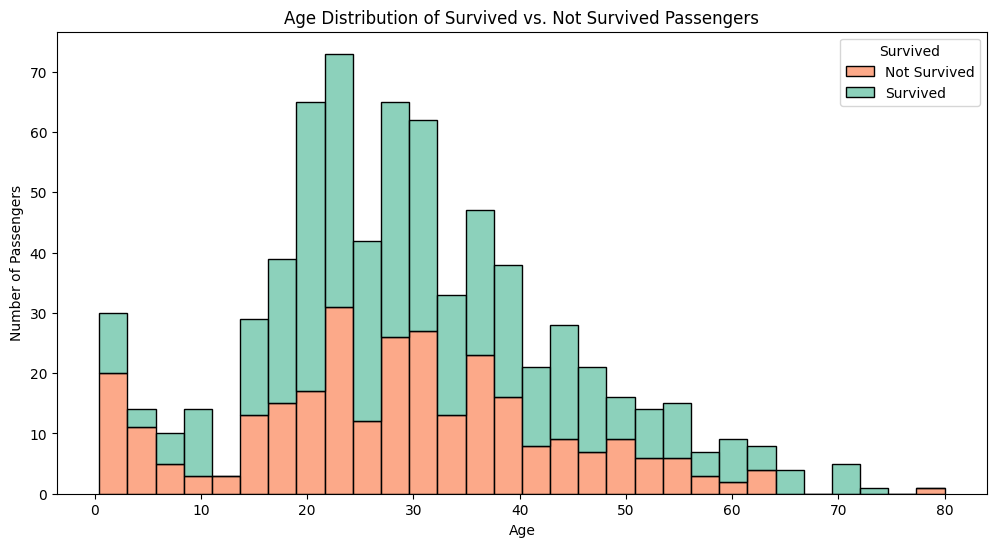

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.histplot(data=titanic_data, x='Age', hue='Survived', kde=False, bins=30, palette='Set2', multiple='stack')

plt.title('Age Distribution of Survived vs. Not Survived Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


In [ ]:
mean_age_survived = titanic_data[titanic_data['Survived'] == 1]['Age'].mean()
mean_age_not_survived = titanic_data[titanic_data['Survived'] == 0]['Age'].mean()

mean_age_survived, mean_age_not_survived


(28.343689655172415, 30.62617924528302)

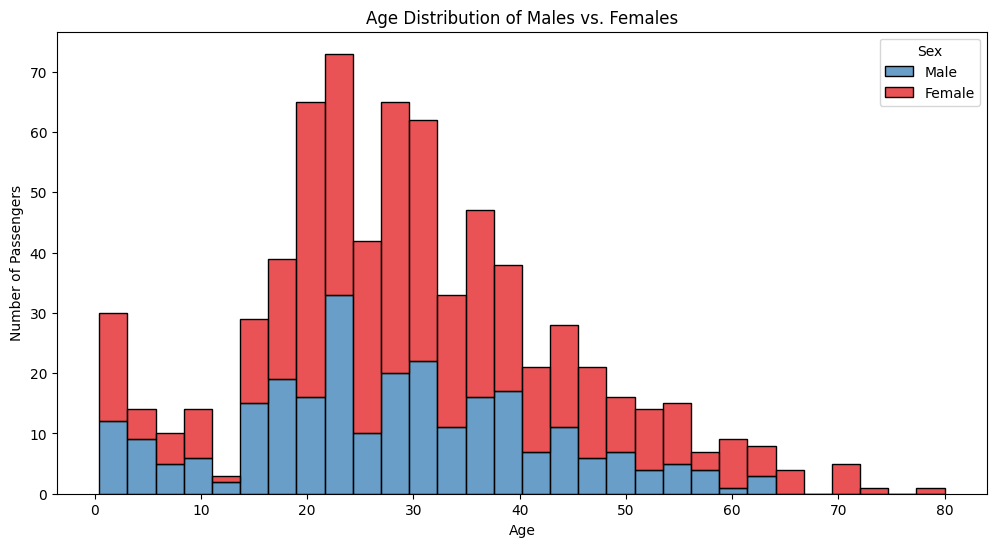

In [ ]:

plt.figure(figsize=(12, 6))

sns.histplot(data=titanic_data, x='Age', hue='Sex', kde=False, bins=30, palette='Set1', multiple='stack')

plt.title('Age Distribution of Males vs. Females')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()


In [ ]:
mean_age_male = titanic_data[titanic_data['Sex'] == 'male']['Age'].mean()
mean_age_female = titanic_data[titanic_data['Sex'] == 'female']['Age'].mean()

mean_age_male, mean_age_female


(30.72664459161148, 27.915708812260537)


**1. Age Distribution for Survived vs. Not Survived Passengers**

- **Visualization:**
  - The first plot shows the age distribution of passengers who survived versus those who did not.
  - **Key things to look at:**
    - There is a noticeable difference in the age distribution of passengers who survived compared to those who did not.
    - Younger passengers, particularly those between the ages of 20 and 40, were more likely to survive.
    - The proportion of passengers who did not survive is higher among older age groups (above 50 years).

- **Mean Ages:**
  - **Survived Mean Age:** 28.34 years
  - **Not Survived Mean Age:** 30.63 years
  - **Conclusion:** The mean age of passengers who did not survive is little bit higher than those who survived, indicating that younger passengers had a higher chance of survival.

**2. Age Distribution for Males vs. Females**

- **Visualization:**
  - The second plot shows the age distribution for male versus female passengers.
  - **Key points:**
    - The distribution for females is skewed towards younger ages, particularly between 20 and 30 years.
    - There is a higher proportion of young female passengers, suggesting that younger women were more prevalent on the Titanic.
    - The male age distribution is more evenly spread, with a notable number of males in their 30s and 40s.

- **Mean Ages:**
  - **Mean Age of Males:** 30.73 years
  - **Mean Age of Females:** 27.92 years
  - **So:** The mean age of males is higher than that of females, which aligns with the observation that there were more young females aboard. This also suggests that younger women might have had better chances of survival due to the "women and children first" policy.

### **Finally:**
- **Survival and Age:**
  - The age distribution shows that younger passengers had a better survival rate compared to older passengers. The mean age difference between survived and not survived passengers, though small, indicates that age played a role in survival, with younger passengers being more likely to survive.

- **Gender and Age:**
  - The age distribution for females is skewed younger, with a higher concentration of young women, whereas the male distribution is more even across ages. The lower mean age for females suggests that younger women were more prevalent and possibly more likely to survive, again due to evacuation priorities.

(NOTE:These insights says that both age and gender were significant factors in survival on the Titanic, with younger individuals, especially females, having higher chances of survival.)